<a href="https://colab.research.google.com/github/gabriela-148/AI/blob/main/Assignment_5/Assignment5_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Assignment 5 Report**

**CSC362**


**3/28/24**
# **Problem 2**

For this assignment, I referred to the func_optimality Juptyer notebook, my notes from lecture, and the Problem 1 notebook I preivously submitted.

The very first step I took was to install and load the GA and plotting libraries.

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
# Loading necessary libaries
library(GA)
library(plotly)
library(ggplot2)


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




After this, I started to create the functions related to the mass of the vehicle, collision acceleration, and toe board intrusion. I referred to the equations listed in the assignment decsription.

In [9]:
 # Define the functions func1 and func2, func3

 # Vehicle Mass
func1 <- function(x) {
  1640.2823 + 2.3573285 * x[1] + 2.3220035 * x[2] + 4.5688768 * x[3] + 7.7213633 * x[4] + 4.4559504 * x[5]
}

# Collision Acceleration
func2 <- function(x) {
  6.5856 + 1.15 * x[1] - 1.0427 * x[2] + 0.9738 * x[3] + 0.8364 * x[4] - 0.3695 * x[1] * x[4] + 0.0861 * x[1] * x[5] + 0.3628 * x[2] * x[4]
 - 0.1106 * x[1] * x[1] - 0.3437 * x[3] * x[3] + 0.1764 * x[4] * x[4]
 }

 # Toe board instrusion
 func3 <- function(x) {
  -0.0551 + 0.0181 * x[1] +0.1024 * x[2] + 0.0421 * x[3] - 0.0073 * x[1] * x[2] + 0.024 * x[2] * x[3] - 0.0118 * x[2] * x[4] - 0.0204 * x[3] * x[4] - 0.008 * x[3] * x[5] - 0.0241 * x[2] * x[2] + 0.0109 * x[4] * x[4]
}

# F function definition
F <- function(x) {
  mass <- func1(x)
  ain <- func2(x)
  intrusion <- func3(x)

  return c(mass, ain, intrusion)
}

After these functions were created, I could use them to start the GA to find the best minimization for both functions.

To do this, I created the weighted_fitness function that represents the F = a *f1 + b * f2, and set up the GA parameters. I started out using the weight values as 0.7 for a and 0.3 for b since the sum of a and b must equal 1.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -0.0635953 
Solution = 
           x1       x2      x3      x4       x5
[1,] 2.680969 2.815767 1.08489 2.39964 2.407464

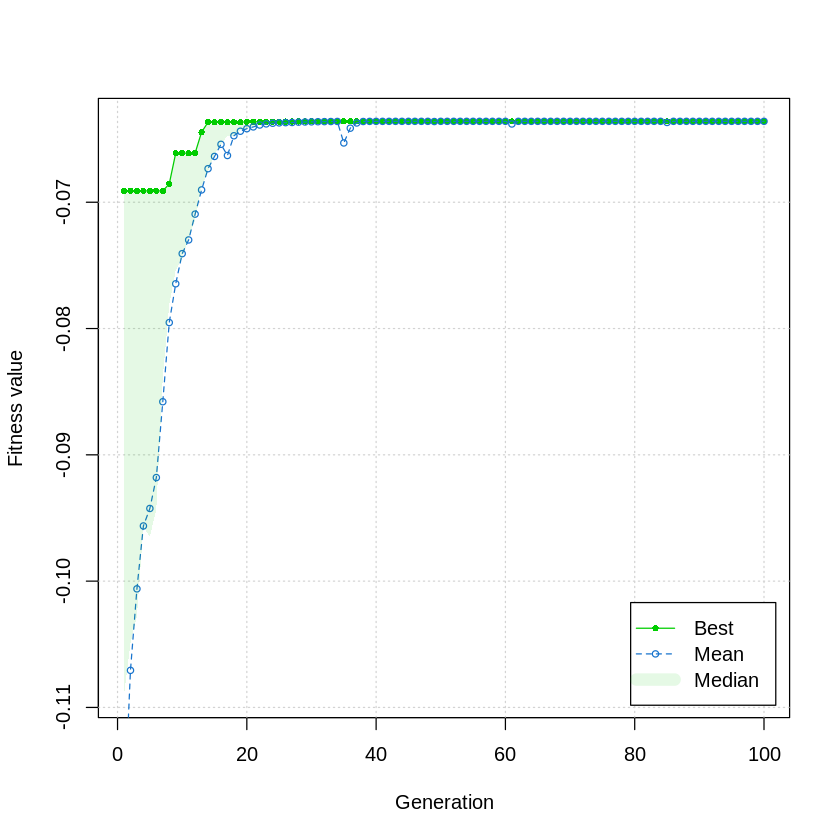

In [11]:
# Set up GA parameters
numGenerations <- 100
populationSize <- 50
Pc <- 0.75
Pm <- 0.001

# Run GA
GA <- ga(type = "real-valued",
         fitness = function(x) -F(x),  # Minimize the F(x) function
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),  # Define bounds for x1, x2, x3, x4, x5
         popSize = populationSize, maxiter = numGenerations, run = 100,
         pcrossover = Pc, pmutation = Pm)

# Summary and plot
summary(GA)
plot(GA)


After plotting these fitness values, I can see that there was a lot of oscallation occurring in the earlier generations of the algorithm. Similar to the previous problem. I can also see that the best and average values remain at a single optimum value after a number of mutations had occurred over generations.

From these values, I can infer that the algorithm mutated much more frequently in the early stages of the algorithm to reach the best and highest average fitness values.

Given this result, I can conclude that this vehicle would protect the occupants from the effects of a frontal accident because the fitness values are as close to 0 as possible. With 0 meaning that the passengers would feel no effect with a full frontal crash. Given that teh best fitness value was -0.06, this vehicle would protect the passengers with minimal damage.